In [231]:
import numpy as np
import matplotlib.pyplot as plt

In [232]:
def coupled_diff_updater(w,v,x,dt,S,C_D,m,rho,A):
    x_vec,v_vec = np.zeros(3),np.zeros(3)

    cst_1 = -C_D*rho*A/(2*m)
    cst_2 = S/m

    V = np.sqrt(np.dot(v,v))

    v_vec[0] = v[0] + dt*(cst_1*V*v[0] + cst_2*(w[1]*v[2] - w[2]*v[1]))
    v_vec[1] = v[1] + dt*(cst_1*V*v[1] - cst_2*(w[0]*v[2] - w[2]*v[0]) - 9.81)
    v_vec[2] = v[2] + dt*(cst_1*V*v[2] + cst_2*(w[0]*v[1] - w[1]*v[0]))

    x_vec[0] = dt*v[0] + x[0]
    x_vec[1] = dt*v[1] + x[1]
    x_vec[2] = dt*v[2] + x[2]

    return x_vec,v_vec

def magnus_coeff(smooth,D,rho,S):
    if smooth:
        S = 4*np.pi*np.power(D/2,3)*rho/3
    else:
        S = S
    return S

In [233]:
#Adjustable Coefficients

#Drag coefficient
C_D = 0.24 #drag coefficient sits between 0.24 and 0.7 based on dimple pattern

#mass in Kg
m = 45.9e-3 #maximum weight of a golf ball is 45.9 grams

#Diameter in m
D = 42.7e-3 #minimum diameter is 42.7mm

#Fluid density in Kg/m^3
rho = 1.204 #air

#smooth selector (boolean)
smooth = False #select False if you want to set your own Magnus coefficient
S = 5e-6 #change this value if above variable set to False
S = magnus_coeff(smooth,D,rho,S)

#initial conditions in meters
x_0 = 0.0
y_0 = 45/3.28084 #45 feet difference across golf course
z_0 = 0.0

#set v_0 components in m/s based on the launch angles. The solver is setup such that
#the y-axis is the vertical direction ==> v_x = v.cos(phi)sin(theta); v_y = v.cos(theta); v_z = v.sin(phi)sin(theta)
#where phi is the azimuth and theta is the pole
# at 0 azimuth and launch angle 35 degrees with the plane with a magnitude of 60 m/s
phi = 0 #degrees
launch_angle = 35 #degrees
v0 = 70 #m/s

#the solver accounts for the ball spinning on all 3 axis, so these must be set as well. Note they are not set to evolve with time.
#set the values of w in rad/s
w_x = 0.0
w_y = 0.0
w_z = 130.0 #backspin

#time step in seconds
dt = 1e-2

In [234]:
#problem set-up and main loop
theta = np.pi/2 - np.pi*launch_angle/180
phi = np.pi*phi/180

#t_flight = 2*v0*np.cos(theta)/9.81 #cos because theta is with the pole, not the ground
#t = np.linspace(0,t_flight,1000)
#dt = t[1] - t[0]

#x,v = np.empty((len(t),3)), np.empty((len(t),3))
#x[0,:], v[0,:]  = np.array([x_0,y_0,z_0]), np.array([v0*np.cos(phi)*np.sin(theta), v0*np.cos(theta), v0*np.sin(phi)*np.sin(theta)]) #initialize vectors
w = np.array([w_x,w_y,w_z])

A = (np.pi*D**2)/4.0 #cross-section area of a sphere
x,v = np.array([x_0,y_0,z_0]), np.array([v0*np.cos(phi)*np.sin(theta), v0*np.cos(theta), v0*np.sin(phi)*np.sin(theta)]) #initialize vectors

#first time step to expand the arrays for the loop to work properly
x_in, v_in = x, v
x_out, v_out = coupled_diff_updater(w,v_in,x_in,dt,S,C_D,m,rho,A)
x, v = np.vstack((x,x_out)), np.vstack((v, v_out))

while np.min(x[:,1]) >= 0.0: # condition set as long the y-axis is above ground keep calculating, in this case the ground is the existing parking lot
    x_in, v_in = x[len(x) - 1,:], v[len(v) - 1,:]
    x_out, v_out = coupled_diff_updater(w,v_in,x_in,dt,S,C_D,m,rho,A)
    x, v = np.vstack((x,x_out)), np.vstack((v, v_out))

Plot Results

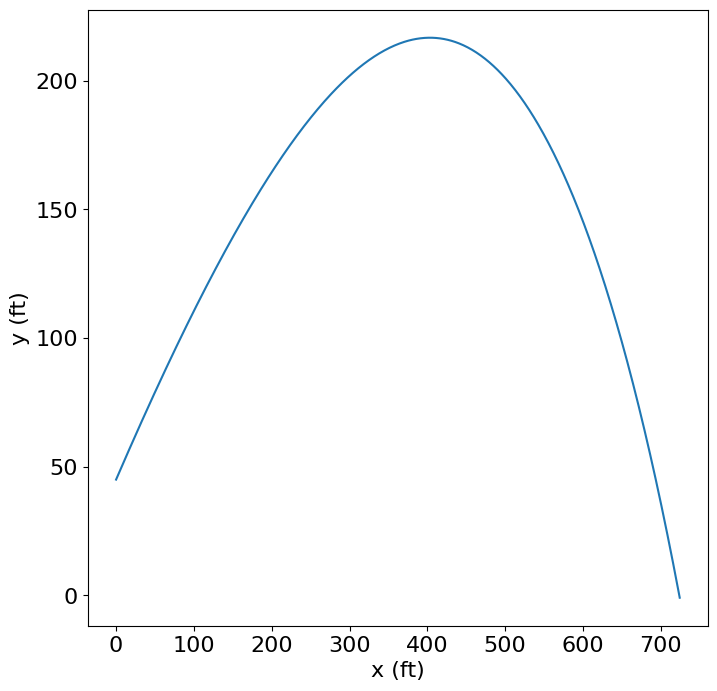

In [235]:
plt.figure(figsize = (8,8))
plt.rcParams['font.size'] = 16
plt.plot(x[:,0]*3.28084,x[:,1]*3.28084) #converting to feet and graphing
plt.xlabel('x (ft)')
plt.ylabel('y (ft)')
plt.show()